## Download EVA annotations 

URL -  s3://object-detection-training-achiya/v3_eva02_autolabeling/full_oi_test_set_eva02.parquet

## Inspect Annotations

In [1]:
import pandas as pd

df = pd.read_parquet('full_oi_test_set_eva02.parquet')
df

,filename,label,confidence,col_x,row_y,width,height
0,/workspace/yolo_v8_training/oiv7_full/test/1f5...,grill,0.973312,700,328,161,109
1,/workspace/yolo_v8_training/oiv7_full/test/1f5...,windshield_wiper,0.964760,482,179,161,23
2,/workspace/yolo_v8_training/oiv7_full/test/1f5...,license_plate,0.963062,763,418,76,74
3,/workspace/yolo_v8_training/oiv7_full/test/1f5...,folding_chair,0.942398,0,281,57,167
4,/workspace/yolo_v8_training/oiv7_full/test/1f5...,license_plate,0.936630,0,154,28,14
...,...,...,...,...,...,...,...
4854958,/workspace/yolo_v8_training/oiv7_full/test/dc5...,microphone,0.112601,991,304,8,9
4854959,/workspace/yolo_v8_training/oiv7_full/test/dc5...,handle,0.107750,991,363,21,18
4854960,/workspace/yolo_v8_training/oiv7_full/test/dc5...,lightbulb,0.104323,109,59,19,9
4854961,/workspace/yolo_v8_training/oiv7_full/test/d68...,dog,0.975688,160,36,725,482


In [2]:
label_counts = df['label'].value_counts()

In [3]:
label_counts.to_csv('label.csv')

Visualize the top label counts

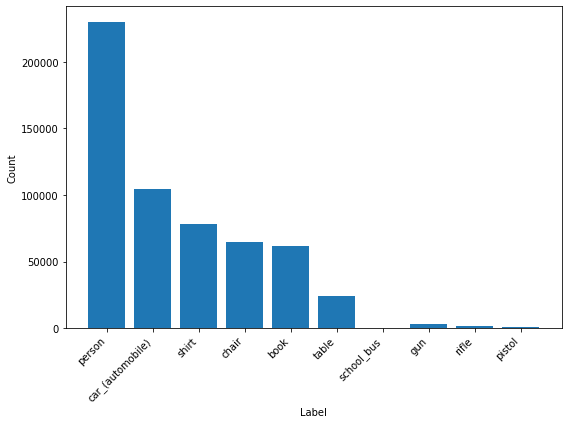

In [4]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

# Filter the label counts for the desired labels
desired_labels = ['person', 'car_(automobile)', 'shirt', 'chair', 'book', 'table', 'school_bus', 'gun', 'rifle', 'pistol']
filtered_counts = label_counts[desired_labels]

plt.figure(figsize=(8, 6))
plt.bar(filtered_counts.index, filtered_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Get rows with school bus label
df = df[df['label'] == 'school_bus'] 
df

,filename,label,confidence,col_x,row_y,width,height
66840,/workspace/yolo_v8_training/oiv7_full/test/18f...,school_bus,0.918969,281,15,207,67
66901,/workspace/yolo_v8_training/oiv7_full/test/18f...,school_bus,0.228692,372,15,116,64
102913,/workspace/yolo_v8_training/oiv7_full/test/3dd...,school_bus,0.175736,231,700,34,32
103160,/workspace/yolo_v8_training/oiv7_full/test/675...,school_bus,0.987765,0,279,1024,404
103161,/workspace/yolo_v8_training/oiv7_full/test/675...,school_bus,0.982008,928,245,96,178
...,...,...,...,...,...,...,...
4611660,/workspace/yolo_v8_training/oiv7_full/test/66c...,school_bus,0.987136,87,1,892,674
4651236,/workspace/yolo_v8_training/oiv7_full/test/dad...,school_bus,0.984731,13,52,871,655
4651237,/workspace/yolo_v8_training/oiv7_full/test/dad...,school_bus,0.971331,863,281,161,356
4731295,/workspace/yolo_v8_training/oiv7_full/test/cbd...,school_bus,0.948844,46,123,978,878


In [8]:
df = pd.DataFrame({
    'filename': df['filename'],
    'label': df['label'],
    'confidence': df['confidence'],
    'x1': df['col_x'],
    'y1': df['row_y'],
    'x2': df['col_x'] + df['width'],
    'y2': df['row_y'] + df['height']
})

In [9]:
df

,filename,label,confidence,x1,y1,x2,y2
66840,/workspace/yolo_v8_training/oiv7_full/test/18fabcc80e6073a1.jpg,school_bus,0.918969,281,15,488,82
66901,/workspace/yolo_v8_training/oiv7_full/test/18fabcc80e6073a1.jpg,school_bus,0.228692,372,15,488,79
102913,/workspace/yolo_v8_training/oiv7_full/test/3dd7193ae03299ea.jpg,school_bus,0.175736,231,700,265,732
103160,/workspace/yolo_v8_training/oiv7_full/test/6750bfec052f7328.jpg,school_bus,0.987765,0,279,1024,683
103161,/workspace/yolo_v8_training/oiv7_full/test/6750bfec052f7328.jpg,school_bus,0.982008,928,245,1024,423
...,...,...,...,...,...,...,...
4611660,/workspace/yolo_v8_training/oiv7_full/test/66c1d376ac55c1c2.jpg,school_bus,0.987136,87,1,979,675
4651236,/workspace/yolo_v8_training/oiv7_full/test/dad645c9dc6a01c3.jpg,school_bus,0.984731,13,52,884,707
4651237,/workspace/yolo_v8_training/oiv7_full/test/dad645c9dc6a01c3.jpg,school_bus,0.971331,863,281,1024,637
4731295,/workspace/yolo_v8_training/oiv7_full/test/cbdeefac3a77dd73.jpg,school_bus,0.948844,46,123,1024,1001


In [10]:
from data_flywheel.utils import create_voc_xml

In [11]:
import os
from tqdm.auto import tqdm

output_directory = 'pascal_voc_annotations'
os.makedirs(output_directory, exist_ok=True)

grouped_df = df.groupby('filename').apply(lambda x: x.to_dict('records')).reset_index(name='objects')

for row in tqdm(grouped_df.itertuples(index=False), total=len(grouped_df), desc='Generating annotations', unit=' imgs'):
    filename = row.filename
    objects = row.objects
    create_voc_xml(filename, objects, output_directory)

<ipython-input-11-c3d7e272c4a0>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('filename').apply(lambda x: x.to_dict('records')).reset_index(name='objects')


Generating annotations:   0%|          | 0/58 [00:00<?, ? imgs/s]